# Timeline of number of posts per month for Twitter

In [ ]:
# Data init
import pandas as pd

# Temp file path
filepath = "C:\Users\dropa\Documents\comet\twitter_comet\Twts1722-Labeled-k5k10-Cos-Euc-METADATA.csv" #input()

# Load the data
twitter_data = pd.read_csv(filepath)[['id', 'created_at']]

twitter_data.head()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2675185951.py, line 5)

In [1]:
# convert all dates to datetime objects
def extract_ymd(time: str):
    str_build = ""
    for char in time:
        if char == 'T':
            return str_build
        else: str_build += char

# clean dates in table
import calendar
from numpy import int64


# TODO - Figure out where the null values are coming

twitter_data["date"] = pd.to_datetime(twitter_data["created_at"].apply(extract_ymd))
twitter_data["month"] = pd.DatetimeIndex(twitter_data['date']).month.astype(int64)
#twitter_data['month'] = twitter_data['month'].apply(lambda x: calendar.month_abbr[x])
twitter_data["year"] = pd.DatetimeIndex(twitter_data['date']).year.fillna(0).astype(int).astype('category')

twitter_data


NameError: name 'pd' is not defined

In [195]:
data_grouping = twitter_data[['id', 'year', 'month']].groupby(['year', 'month']).agg({'id': 'count'}).drop(0)
data_grouping

id
year month    
2017 -1      0
      1      0
      2      0
      3      0
      4      0
...         ..
2022  8      0
      9      0
      10     0
      11     0
      12     0

[65 rows x 1 columns]

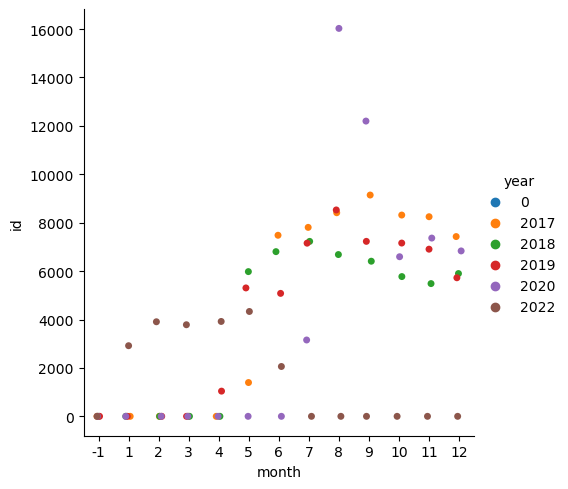

In [191]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(data_grouping, x='month', y='id', hue='year')

